In [742]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(42)

from scipy.stats import norm, ttest_ind

import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

In [743]:
df = pd.read_excel('default of credit card clients.xls', skiprows=range(1))
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [744]:
idx = 0
while idx<np.shape(df)[1]:
    df[df.columns[idx]].isna().value_counts()
    idx += 1

In [745]:
idx = 0
while idx<np.shape(df)[1]:
    print(df[df.columns[idx]].isnull().value_counts())
    idx += 1

False    30000
Name: ID, dtype: int64
False    30000
Name: LIMIT_BAL, dtype: int64
False    30000
Name: SEX, dtype: int64
False    30000
Name: EDUCATION, dtype: int64
False    30000
Name: MARRIAGE, dtype: int64
False    30000
Name: AGE, dtype: int64
False    30000
Name: PAY_0, dtype: int64
False    30000
Name: PAY_2, dtype: int64
False    30000
Name: PAY_3, dtype: int64
False    30000
Name: PAY_4, dtype: int64
False    30000
Name: PAY_5, dtype: int64
False    30000
Name: PAY_6, dtype: int64
False    30000
Name: BILL_AMT1, dtype: int64
False    30000
Name: BILL_AMT2, dtype: int64
False    30000
Name: BILL_AMT3, dtype: int64
False    30000
Name: BILL_AMT4, dtype: int64
False    30000
Name: BILL_AMT5, dtype: int64
False    30000
Name: BILL_AMT6, dtype: int64
False    30000
Name: PAY_AMT1, dtype: int64
False    30000
Name: PAY_AMT2, dtype: int64
False    30000
Name: PAY_AMT3, dtype: int64
False    30000
Name: PAY_AMT4, dtype: int64
False    30000
Name: PAY_AMT5, dtype: int64
False    30000

In [746]:
df.rename(columns={'LIMIT_BAL':'BAL'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df.head()

,ID,BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### FEATURE SELECTION 

In [747]:
payments = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

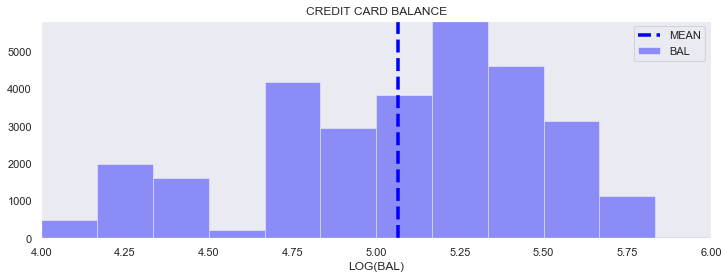

In [748]:
plt.figure(figsize=(12,4))
df['BAL'].apply(np.log10).hist(bins=12, color='blue', alpha=0.4, label='BAL')
bal_avg = np.mean(df['BAL'].apply(np.log10).values)
plt.axvline(bal_avg, linestyle='--', linewidth=3.5, color='blue', label='MEAN')
plt.legend()
plt.grid()
plt.xlabel('LOG(BAL)')
plt.title('CREDIT CARD BALANCE')
plt.autoscale(enable=True, tight=True)
plt.show()

In [749]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [750]:
np.round(df['SEX'].value_counts()[2]*100/df['SEX'].value_counts().sum()), np.round(df['SEX'].value_counts()[1]*100/df['SEX'].value_counts().sum())

(60.0, 40.0)

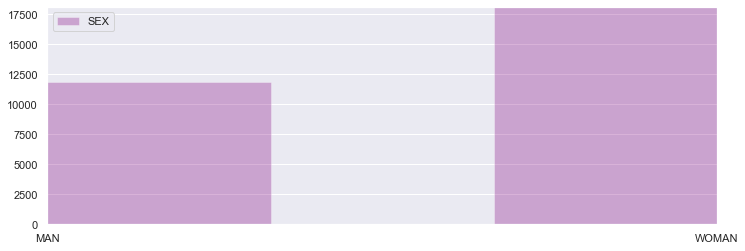

In [751]:
plt.figure(figsize=(12,4))
plt.hist(df['SEX'], bins=3, alpha=0.3, color='purple', label='SEX')
plt.xticks([1,2],('MAN', 'WOMAN'))
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.show()

In [752]:
df['EDUCATION'].value_counts()/df['EDUCATION'].value_counts().sum()

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: EDUCATION, dtype: float64

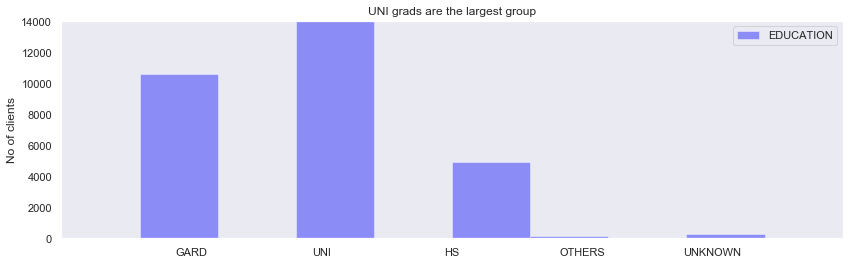

In [753]:
plt.figure(figsize=(14,4))
df['EDUCATION'].hist(color='blue', alpha=0.4, label=['EDUCATION'] )
plt.grid()
plt.legend()
plt.title('UNI grads are the largest group')
plt.xticks( [1,2,3,4,5], ('GARD','UNI','HS','OTHERS','UNKNOWN') )
plt.ylabel('No of clients')
plt.autoscale(enable=True, tight=True)
plt.show()

In [754]:
df['MARRIAGE'].value_counts()/df['MARRIAGE'].value_counts().sum()

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

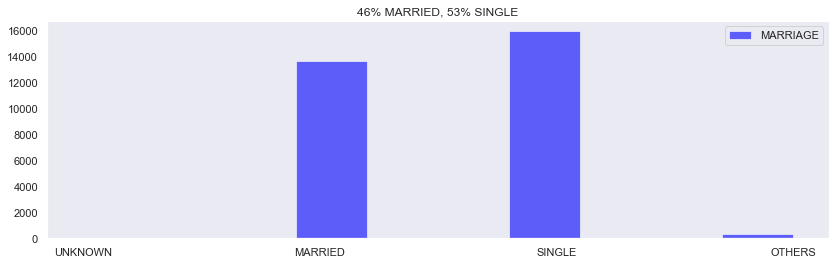

In [755]:
plt.figure(figsize=(14,4))
df['MARRIAGE'].hist(color='blue', alpha=0.6, label='MARRIAGE')
plt.xticks([1, 2, 3, 0], ('MARRIED', 'SINGLE', 'OTHERS', 'UNKNOWN'))
plt.autoscale(enable=True)
plt.legend()
plt.title('46% MARRIED, 53% SINGLE')
plt.grid()
plt.show()

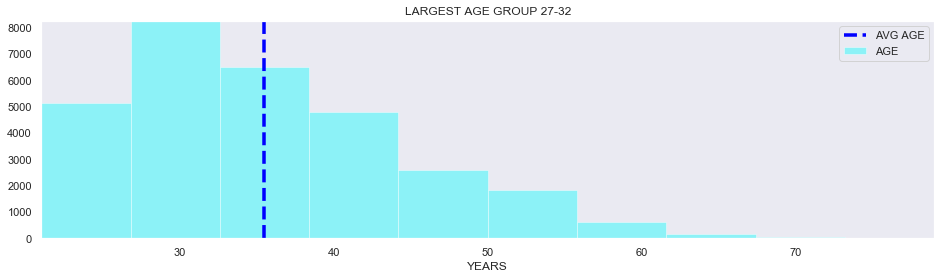

In [756]:
plt.figure(figsize=(16,4))
df['AGE'].hist(color='cyan', alpha=0.4, label='AGE')
plt.title('LARGEST AGE GROUP 27-32')
plt.axvline(df['AGE'].mean(), color='blue', linestyle='--', linewidth=3.5, label='AVG AGE')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.grid()
plt.xlabel('YEARS')
plt.show()

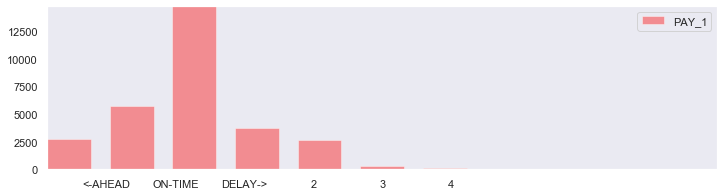

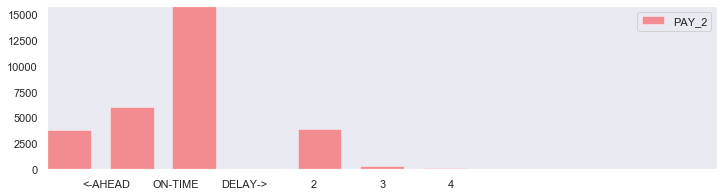

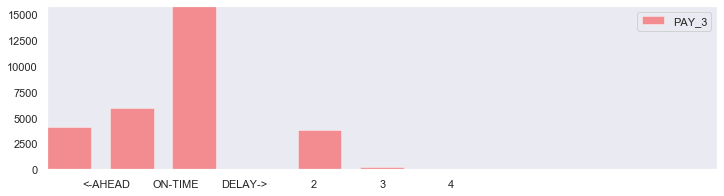

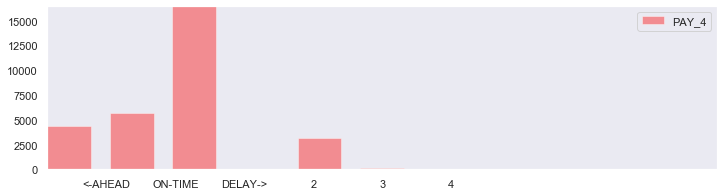

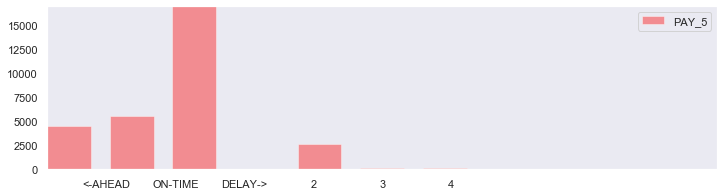

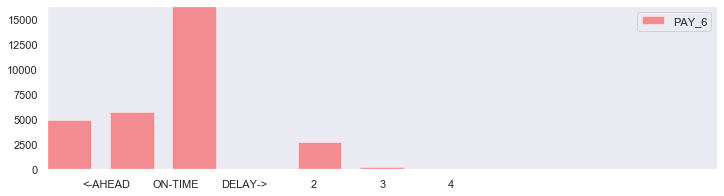

In [757]:
payments = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for pay in payments:
    plt.figure(figsize=(12,3))
    df[pay].hist(bins=11, color='red', alpha=0.4, rwidth=0.7, label=pay)
    plt.grid()
    plt.legend()
    plt.xticks([-2,-1,0,1,2,3,4], ('-2', '<-AHEAD', 'ON-TIME', 'DELAY->', '2', '3', '4'))
    plt.autoscale(tight=True, enable=True)
    plt.show()

## BINARY CLASSIFICATION

In [758]:
df.columns

Index(['ID', 'BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

We would classify customers into two groups 

## (1) CREDITABLE CUSTOMER (CC)
## (2) NOT CREDITABLE CUSTOMER (NCC)

In [759]:
df[ payments ].head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [760]:
df[ payments ].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
PAY_1    30000 non-null int64
PAY_2    30000 non-null int64
PAY_3    30000 non-null int64
PAY_4    30000 non-null int64
PAY_5    30000 non-null int64
PAY_6    30000 non-null int64
dtypes: int64(6)
memory usage: 1.4 MB


In [761]:
df[ payments ].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [762]:
df['PAY_1'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

In [763]:
pay_records_CC = [] 
pay_records_NCC = []
for pay in payments:
    #print(df[pay].apply(lambda x:1 if (x<=0) else 0).value_counts().tolist()[0]/30000.0)
    creditable_customer = df[pay].apply(lambda x:1 if (x<=0) else 0).value_counts().tolist()[0]/30000.0
    #print(creditable_customer)
    pay_records_CC.append(creditable_customer)
    not_creditable_customer = df[pay].apply(lambda x:1 if (x<=0) else 0).value_counts().tolist()[1]/30000.0
    pay_records_NCC.append(not_creditable_customer)

In [764]:
pay_records_CC

[0.7727333333333334,
 0.8520666666666666,
 0.8595666666666667,
 0.883,
 0.9010666666666667,
 0.8973666666666666]

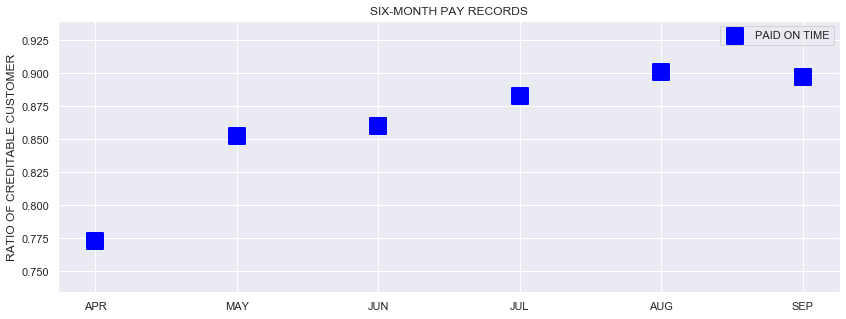

In [765]:
plt.figure(figsize=(14,5))
plt.scatter(np.arange(1,7,1),pay_records_CC, s=2**8, c='blue', marker='s',linewidths=2, label='PAID ON TIME')
#plt.scatter(np.arange(1,7,1),pay_records_NCC, s=2**8, c='green', marker='s',linewidths=2, label='NOT CREDITABLE' )
plt.legend()
plt.autoscale(enable=True)
plt.title('SIX-MONTH PAY RECORDS')
plt.ylabel('RATIO OF CREDITABLE CUSTOMER')
plt.xticks([1,2,3,4,5,6],('APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'))
plt.show()

In [766]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [767]:
binary_pay_records_edu = []  
for e in [2,1,3]:
    df_ = df[(df['EDUCATION']==e)]
    print(len(df_))
    P_R = []
    for pay in payments:
        creditable_customer = df_[pay].apply(lambda x:1 if (x<=0) else 0).value_counts().tolist()[0]/30000
        P_R.append(creditable_customer)
    binary_pay_records_edu.append([P_R])

14030
10585
4917


In [768]:
np.shape(binary_pay_records_edu)

(3, 1, 6)

In [769]:
pay_uni = binary_pay_records_edu[0][0] # UNI
pay_grad = binary_pay_records_edu[1][0] # GRAD
pay_hs = binary_pay_records_edu[2][0] # HS

In [770]:
pay_uni

[0.3564,
 0.38863333333333333,
 0.394,
 0.4055,
 0.4150333333333333,
 0.41336666666666666]

In [771]:
pay_edu = [pay_uni, pay_grad, pay_hs]

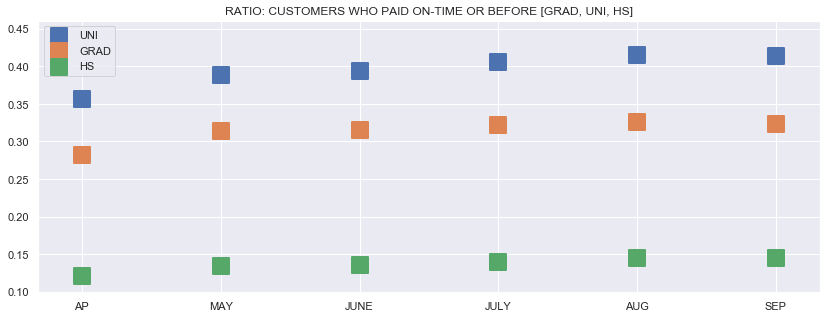

In [772]:
lab = ['UNI', 'GRAD', 'HS']
plt.figure(figsize=(14,5))
for p in range(0,3):
    plt.scatter(np.arange(1,7,1), pay_edu[p], label=lab[p],  s=2**8, marker='s',linewidths=2 )
    
plt.legend()
plt.title('RATIO: CUSTOMERS WHO PAID ON-TIME OR BEFORE [GRAD, UNI, HS]')
plt.xticks([1,2,3,4,5,6],('AP', 'MAY', 'JUNE', 'JULY', 'AUG', 'SEP'))
plt.show()

#### So University Students and Grads show better trends for month to month payments comparing to HS Students. 

In [773]:
df['MARRIAGE'].value_counts(), df['MARRIAGE'].value_counts().index, df['MARRIAGE'].value_counts().values

(2    15964
 1    13659
 3      323
 0       54
 Name: MARRIAGE, dtype: int64,
 Int64Index([2, 1, 3, 0], dtype='int64'),
 array([15964, 13659,   323,    54]))

In [774]:
binary_pay_recors_ms = []  
for ms in [1,2,3]:
    df_ = df[(df['MARRIAGE']==ms)]
    #print(df_.head())
    print(len(df_))
    P_R = []
    for pay in payments:
        creditable_customer = df_[pay].apply(lambda x:1 if (x<=0) else 0).value_counts().tolist()[0]/30000
        P_R.append(creditable_customer)
    binary_pay_recors_ms.append([P_R])

13659
15964
323


In [775]:
np.shape(binary_pay_recors_ms)

(3, 1, 6)

In [776]:
pay_married = binary_pay_recors_ms[0][0]
pay_married 

[0.3485333333333333,
 0.38603333333333334,
 0.3912,
 0.4009666666666667,
 0.4098,
 0.40903333333333336]

In [777]:
pay_single = binary_pay_recors_ms[1][0]
pay_single 

[0.4147666666666667, 0.4554, 0.4578, 0.4711, 0.47973333333333334, 0.4771]

In [778]:
pay_other = binary_pay_recors_ms[2][0]
pay_other

[0.008033333333333333,
 0.009133333333333334,
 0.009133333333333334,
 0.009433333333333334,
 0.009933333333333334,
 0.009666666666666667]

In [779]:
pay_records_ms = [pay_married, pay_single, pay_other]

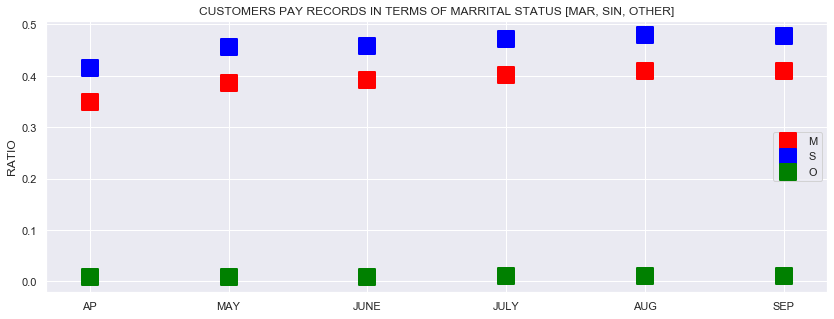

In [780]:
colr = ['red', 'blue', 'green']
lab_ = ['M', 'S', 'O']
plt.figure(figsize=(14,5))
for p in range(0,3):
    plt.scatter(np.arange(1,7,1),pay_records_ms[p], label=lab_[p], color=colr[p],  s=2**8,marker='s',linewidths=2 )
    
plt.legend('MSO')
plt.ylabel('RATIO')
plt.title('CUSTOMERS PAY RECORDS IN TERMS OF MARRITAL STATUS [MAR, SIN, OTHER]')
plt.xticks([1,2,3,4,5,6],('AP', 'MAY', 'JUNE', 'JULY', 'AUG', 'SEP'))
plt.show()

#### Also Married and Single show similar trend for month to month payment. 

### CLASSIFICATION: PAY STATUS
#### AGE

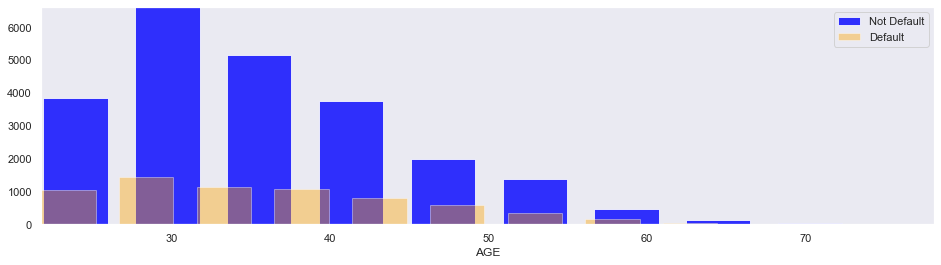

In [781]:
plt.figure(figsize=(16,4))
df_nd = df[df['default payment next month']==0]
df_d = df[df['default payment next month']==1]
df_nd['AGE'].hist(bins=10, alpha=0.8, color='blue', rwidth=0.7, label='Not Default')
df_d['AGE'].hist(bins=11, alpha=0.4, color='orange', rwidth=0.7, label='Default')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.xlabel('AGE')
plt.grid()
plt.show()

#### BALANCE

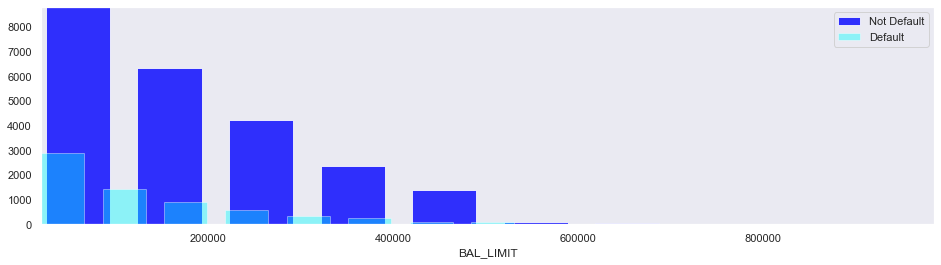

In [782]:
plt.figure(figsize=(16,4))
df_nd['BAL'].hist(bins=10, alpha=0.8, color='blue', rwidth=0.7, label='Not Default')
df_d['BAL'].hist(bins=11, alpha=0.4, color='cyan', rwidth=0.7, label='Default')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.xlabel('BAL_LIMIT')
plt.grid()
plt.show()

#### EDUCATION

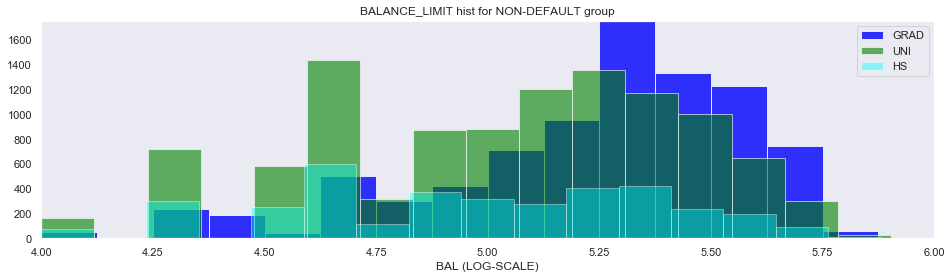

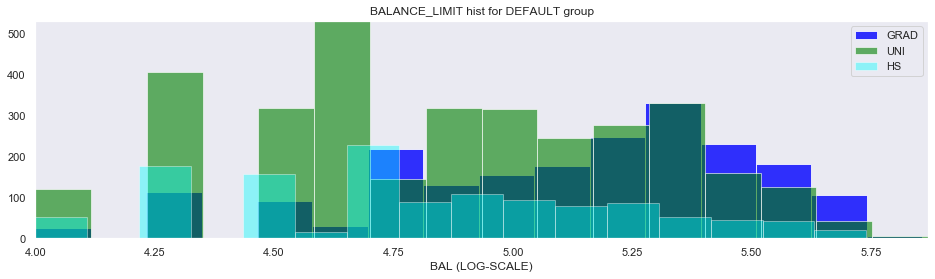

In [783]:
edu1 = df_nd[df_nd['EDUCATION']==1]; edu2 = df_nd[df_nd['EDUCATION']==2]; edu3 = df_nd[df_nd['EDUCATION']==3]
plt.figure(figsize=(16,4))
edu1['BAL'].apply(np.log10).hist(bins=16, alpha=0.8, color='blue', label='GRAD')
edu2['BAL'].apply(np.log10).hist(bins=16, alpha=0.6, color='green', label='UNI')
edu3['BAL'].apply(np.log10).hist(bins=16, alpha=0.4, color='cyan', label='HS')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('BALANCE_LIMIT hist for NON-DEFAULT group')
plt.xlabel('BAL (LOG-SCALE)')
plt.grid()
plt.show()

edu1 = df_d[df_d['EDUCATION']==1]; edu2 = df_d[df_d['EDUCATION']==2]; edu3 = df_d[df_d['EDUCATION']==3]
plt.figure(figsize=(16,4))
edu1['BAL'].apply(np.log10).hist(bins=16, alpha=0.8, color='blue', label='GRAD')
edu2['BAL'].apply(np.log10).hist(bins=16, alpha=0.6, color='green', label='UNI')
edu3['BAL'].apply(np.log10).hist(bins=16, alpha=0.4, color='cyan', label='HS')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('BALANCE_LIMIT hist for DEFAULT group')
plt.xlabel('BAL (LOG-SCALE)')
plt.grid()
plt.show()

#### MARRITAL STATUS

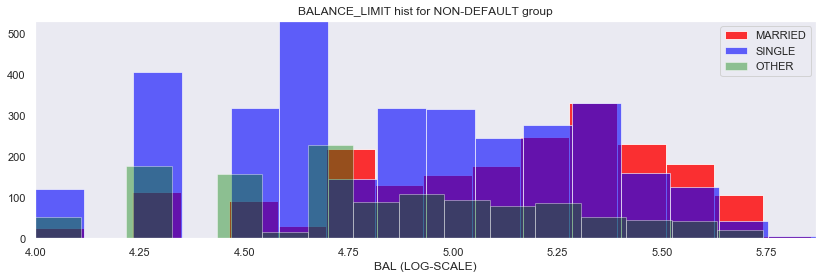

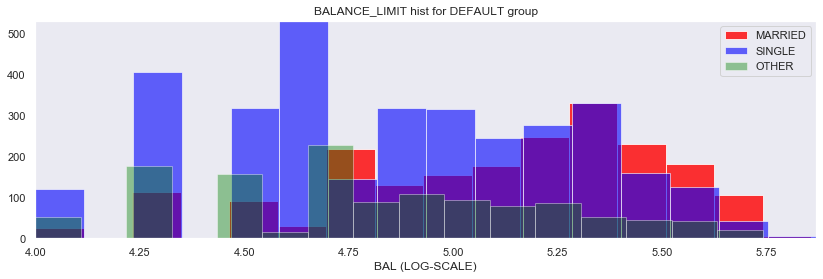

In [784]:
msta1 = df_nd[df_nd['MARRIAGE']==1]; msta12 = df_nd[df_nd['MARRIAGE']==2]; msta13 = df_nd[df_nd['MARRIAGE']==3]
plt.figure(figsize=(14,4))
edu1['BAL'].apply(np.log10).hist(bins=16, alpha=0.8, color='red', label='MARRIED')
edu2['BAL'].apply(np.log10).hist(bins=16, alpha=0.6, color='blue', label='SINGLE')
edu3['BAL'].apply(np.log10).hist(bins=16, alpha=0.4, color='green', label='OTHER')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('BALANCE_LIMIT hist for NON-DEFAULT group')
plt.xlabel('BAL (LOG-SCALE)')
plt.grid()
plt.show()

msta1 = df_d[df_d['MARRIAGE']==1]; msta12 = df_d[df_d['MARRIAGE']==2]; msta13 = df_d[df_d['MARRIAGE']==3]
plt.figure(figsize=(14,4))
edu1['BAL'].apply(np.log10).hist(bins=16, alpha=0.8, color='red', label='MARRIED')
edu2['BAL'].apply(np.log10).hist(bins=16, alpha=0.6, color='blue', label='SINGLE')
edu3['BAL'].apply(np.log10).hist(bins=16, alpha=0.4, color='green', label='OTHER')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('BALANCE_LIMIT hist for DEFAULT group')
plt.xlabel('BAL (LOG-SCALE)')
plt.grid()
plt.show()

#### AGE

### INFERENTIAL STATISTICS

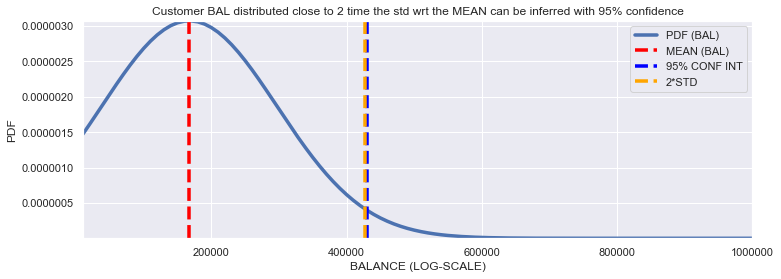

In [785]:
bal = np.sort(df['BAL'].values)
bal_pdf = norm.pdf(bal, loc=np.mean(bal), scale=np.std(bal))
bal_cdf = norm.cdf(bal, loc=np.mean(bal), scale=np.std(bal))
plt.figure(figsize=(12,4))
plt.plot(bal, bal_pdf, label='PDF (BAL)',linewidth=3.5)
plt.axvline(np.mean(bal), linestyle='--', color='red', label='MEAN (BAL)', linewidth=3.5)
plt.axvline(np.percentile(bal, [95]), linestyle='--', color='blue', label='95% CONF INT',linewidth=3.5)
plt.axvline(np.mean(bal)+2*np.std(bal), linestyle='--', color='orange', label='2*STD',linewidth=3.5)
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('Customer BAL distributed close to 2 time the std wrt the MEAN can be inferred with 95% confidence')
plt.xlabel('BALANCE (LOG-SCALE)')
plt.ylabel('PDF')
plt.show()

#### As we see 95% of the customer balance is within 2*STD of the mean.

In [786]:
ttest_ind(df_nd['BAL'].values, df_d['BAL'].values, equal_var=False)

Ttest_indResult(statistic=28.951587933509845, pvalue=3.3641002455114717e-178)

### PREDICTION: MACHINE LEARNING

In [787]:
df.columns

Index(['ID', 'BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Feature Engineering

In [788]:
PAY = []
for idx in range(6): 
    for j in range(len(df)): 
        if (df[str(df.columns[idx+11])].iloc[j]) < 3*(df[str(df.columns[idx+17])].iloc[j]):
            PAY.append(-2)
        elif (df[str(df.columns[idx+11])].iloc[j]) < 2*(df[str(df.columns[idx+17])].iloc[j]):
            PAY.append(-1)
        elif (df[str(df.columns[idx+11])].iloc[j]) <= (df[str(df.columns[idx+17])].iloc[j]):
            PAY.append(0)
        elif (df[str(df.columns[idx+11])].iloc[j]) < 0.5*(df[str(df.columns[idx+17])].iloc[j]):
            PAY.append(1)
        else:
            PAY.append(2)

In [789]:
payr = np.array(PAY).reshape(6, len(df))
payr[:,0:10]

array([[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  0],
       [ 2, -2,  2,  2, -2,  2,  2, -2,  2,  0],
       [ 2, -2,  2,  2,  2,  2,  2,  2,  2,  0],
       [ 0,  2,  2,  2, -2,  2,  2, -2,  2, -2],
       [ 0,  2,  2,  2,  2,  2,  2, -2,  2,  2]])

In [790]:
np.shape(payr)

(6, 30000)

In [791]:
col = ['PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4', 'PAY-FE-5', 'PAY-FE-6']
for idx in range(6):
    df[col[idx]] = payr[idx,:]

In [792]:
df['PAY-FE-1'].value_counts()

-2    28777
 2      647
 0      563
 1       13
Name: PAY-FE-1, dtype: int64

In [793]:
df.head()

,ID,BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PAY-FE-1,PAY-FE-2,PAY-FE-3,PAY-FE-4,PAY-FE-5,PAY-FE-6
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,-2,2,2,2,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,-2,2,-2,-2,2,2
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,-2,2,2,2,2,2
3,4,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,-2,2,2,2,2,2
4,5,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,-2,2,-2,2,-2,2


In [794]:
df.columns

Index(['ID', 'BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3',
       'PAY-FE-4', 'PAY-FE-5', 'PAY-FE-6'],
      dtype='object')

In [795]:
#col_PA = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4','PAY-FE-5', 'PAY-FE-6']

In [796]:
df['BAL'] = df['BAL'].apply(np.log10)

In [797]:
cols = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4','PAY-FE-5', 'PAY-FE-6', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BAL']


In [798]:
# cols = ['BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
#        'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3',
#        'PAY-FE-4', 'PAY-FE-5', 'PAY-FE-6']

In [799]:
from sklearn import preprocessing 
X = preprocessing.StandardScaler().fit(df[cols].values).transform(df[cols].values)

In [800]:
X[0:3,:]

array([[ 1.79456386,  1.78234817, -0.69666346, -0.66659873, -1.53004603,
        -1.48604076, -0.19575971,  0.63316652,  0.64903252,  0.64205265,
        -0.55302602, -0.50948325,  0.81016074,  0.18582826, -1.05729503,
        -1.24601985, -1.8695978 ],
       [-0.87499115,  1.78234817,  0.1388648 ,  0.18874609,  0.23491652,
         1.99231551, -0.19575971,  0.63316652, -1.66963084, -1.72017196,
         0.63986876,  0.66878514,  0.81016074,  0.18582826,  0.85855728,
        -1.02904717,  0.03426257],
       [ 0.01486052,  0.1117361 ,  0.1388648 ,  0.18874609,  0.23491652,
         0.25313738, -0.19575971,  0.63316652,  0.64903252,  0.64205265,
         0.63986876,  0.66878514,  0.81016074,  0.18582826,  0.85855728,
        -0.16115646, -0.27141824]])

In [801]:
y = df['default payment next month']

In [802]:
y.value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

#### LogisticRegression

In [803]:
from sklearn.linear_model import LogisticRegression

In [804]:
x_tr, x_t, y_tr, y_t = train_test_split( X, y, test_size=0.35, random_state=100)
lr = LogisticRegression()
lr.fit(x_tr, y_tr)
y_p = lr.predict(x_t)
y_tr_p = lr.predict(x_tr)

accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.8033333333333333 ROC score :  0.6047668383358815

classification report : 

               precision    recall  f1-score   support

           0       0.81      0.97      0.88      8092
           1       0.71      0.24      0.36      2408

   micro avg       0.80      0.80      0.80     10500
   macro avg       0.76      0.60      0.62     10500
weighted avg       0.79      0.80      0.76     10500

confusion matrix : 

 [[7862  230]
 [1835  573]]


In [805]:
accuracy = accuracy_score(y_tr, y_tr_p)
roc = roc_auc_score(y_tr, y_tr_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_tr, y_tr_p))
print("confusion matrix : \n\n", confusion_matrix(y_tr, y_tr_p))

accuracy score :  0.8099487179487179 ROC score :  0.6002151215201805

classification report : 

               precision    recall  f1-score   support

           0       0.82      0.97      0.89     15272
           1       0.68      0.23      0.34      4228

   micro avg       0.81      0.81      0.81     19500
   macro avg       0.75      0.60      0.62     19500
weighted avg       0.79      0.81      0.77     19500

confusion matrix : 

 [[14822   450]
 [ 3256   972]]


### Gaussian Naive Bayes

In [806]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_tr, y_tr)
y_p = gnb.predict(x_t)
y_tr_p = gnb.predict(x_tr)


accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.7940952380952381 ROC score :  0.681179516950419

classification report : 

               precision    recall  f1-score   support

           0       0.85      0.89      0.87      8092
           1       0.56      0.47      0.51      2408

   micro avg       0.79      0.79      0.79     10500
   macro avg       0.71      0.68      0.69     10500
weighted avg       0.78      0.79      0.79     10500

confusion matrix : 

 [[7200  892]
 [1270 1138]]


### Decision Tree Classifier

In [807]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_tr, y_tr)
y_p = dtc.predict(x_t)
y_tr_p = dtc.predict(x_tr)


accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.7308571428571429 ROC score :  0.6179818712710802

classification report : 

               precision    recall  f1-score   support

           0       0.82      0.83      0.83      8092
           1       0.41      0.41      0.41      2408

   micro avg       0.73      0.73      0.73     10500
   macro avg       0.62      0.62      0.62     10500
weighted avg       0.73      0.73      0.73     10500

confusion matrix : 

 [[6688 1404]
 [1422  986]]


### ExtraTreesClassifier

In [808]:
from sklearn.ensemble import ExtraTreesClassifier
clf_extree = ExtraTreesClassifier()
clf_extree.fit(x_tr, y_tr)
y_h = clf_extree.predict(x_t)
y_tr_h = clf_extree.predict(x_tr)


accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))


accuracy score :  0.7308571428571429 ROC score :  0.6179818712710802

classification report : 

               precision    recall  f1-score   support

           0       0.82      0.83      0.83      8092
           1       0.41      0.41      0.41      2408

   micro avg       0.73      0.73      0.73     10500
   macro avg       0.62      0.62      0.62     10500
weighted avg       0.73      0.73      0.73     10500

confusion matrix : 

 [[6688 1404]
 [1422  986]]


### Random forest Classifier

In [809]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10)
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
y_tr_p = clf.predict(x_tr)


accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.8179047619047619 ROC score :  0.6588512628033429

classification report : 

               precision    recall  f1-score   support

           0       0.83      0.95      0.89      8092
           1       0.70      0.37      0.48      2408

   micro avg       0.82      0.82      0.82     10500
   macro avg       0.77      0.66      0.68     10500
weighted avg       0.80      0.82      0.80     10500

confusion matrix : 

 [[7709  383]
 [1529  879]]


### ensemble.GradientBoostClassifier

In [810]:
from sklearn.ensemble import GradientBoostingClassifier
clf = ensemble.GradientBoostingClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
y_tr_p = clf.predict(x_tr)


accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.8193333333333334 ROC score :  0.6638619538102519

classification report : 

               precision    recall  f1-score   support

           0       0.84      0.95      0.89      8092
           1       0.70      0.38      0.49      2408

   micro avg       0.82      0.82      0.82     10500
   macro avg       0.77      0.66      0.69     10500
weighted avg       0.80      0.82      0.80     10500

confusion matrix : 

 [[7696  396]
 [1501  907]]


### GRID SEARCH 

### CROSS-VALIDATION with best grid parameter

In [811]:
x_tr, x_t, y_tr, y_t = train_test_split( df[cols].values, (df['default payment next month']).values, test_size=test_sizee[ret_max(scores)[1]])


In [812]:
MLclf = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), ExtraTreesClassifier(), RandomForestClassifier(), ensemble.GradientBoostingClassifier() ]
roc_list = []
for clf in MLclf: 
    y_p = clf.fit(x_tr, y_tr).predict(x_t)
    roc_list.append(roc_auc_score(y_t, y_p))

In [813]:
best_roc = 0
best_roc_idx = 0

for idx in range(len(roc_list)):
    if (roc_list[idx]>best_roc):
        best_roc = roc_list[idx]
        best_roc_idx = idx
        
print('The best classifier from default parameter :', MLclf[best_roc_idx], '\n', 'with roc_auc_score : ', best_roc)       

The best classifier from default parameter : GaussianNB(priors=None, var_smoothing=1e-09) 
 with roc_auc_score :  0.6719912942024496


### Grid Search
#### Random Forest Classifier

In [814]:
df['BAL'] = df['BAL']/1000000.00
cols = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4','PAY-FE-5', 'PAY-FE-6', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BAL']
x_tr, x_t, y_tr, y_t = train_test_split(df[cols], df['default payment next month'], test_size=test_sizee[ret_max(scores)[1]], random_state=100)

In [815]:
clf = GaussianNB()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
y_tr_p = clf.predict(x_tr)
accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.7968764879535283 ROC score :  0.6760841286188491

classification report : 

               precision    recall  f1-score   support

           0       0.85      0.90      0.87      8092
           1       0.57      0.45      0.51      2409

   micro avg       0.80      0.80      0.80     10501
   macro avg       0.71      0.68      0.69     10501
weighted avg       0.78      0.80      0.79     10501

confusion matrix : 

 [[7277  815]
 [1318 1091]]


## ML in Depth Analysis 

#### LogisticRegression 

In [816]:
cols = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [817]:
x_tr, x_t, y_tr, y_t = train_test_split(df[cols], df['default payment next month'], test_size=0.4)
clf = LogisticRegression()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)

accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.8059166666666666 ROC score :  0.597820809726851

classification report : 

               precision    recall  f1-score   support

           0       0.81      0.98      0.89      9305
           1       0.72      0.22      0.34      2695

   micro avg       0.81      0.81      0.81     12000
   macro avg       0.77      0.60      0.61     12000
weighted avg       0.79      0.81      0.76     12000

confusion matrix : 

 [[9078  227]
 [2102  593]]


#### DecisionTreeClassifier

In [818]:
dtc = DecisionTreeClassifier()
dtc.fit(x_tr, y_tr)
y_t = dtc.predict(x_t)
accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.93675 ROC score :  0.7570610924474306

classification report : 

               precision    recall  f1-score   support

           0       0.94      0.99      0.97     10575
           1       0.91      0.52      0.66      1425

   micro avg       0.94      0.94      0.94     12000
   macro avg       0.92      0.76      0.81     12000
weighted avg       0.94      0.94      0.93     12000

confusion matrix : 

 [[10498    77]
 [  682   743]]


#### ExtraTreesClassifier

In [819]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
clf_extree = ExtraTreesClassifier()
clf_extree.fit(x_tr, y_tr)
y_p = clf_extree.predict(x_t)

accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.9949166666666667 ROC score :  0.9855791962174941

classification report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10575
           1       0.98      0.97      0.98      1425

   micro avg       0.99      0.99      0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000

confusion matrix : 

 [[10552    23]
 [   38  1387]]


#### RandomForestClassifier 

In [820]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)

accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.9905833333333334 ROC score :  0.9767450541246734

classification report : 

               precision    recall  f1-score   support

           0       0.99      0.99      0.99     10575
           1       0.96      0.96      0.96      1425

   micro avg       0.99      0.99      0.99     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.99      0.99      0.99     12000

confusion matrix : 

 [[10521    54]
 [   59  1366]]


#### GradientBoostingClassifier 

In [821]:
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier()
clf.fit(x_tr, y_tr)
accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.9905833333333334 ROC score :  0.9767450541246734

classification report : 

               precision    recall  f1-score   support

           0       0.99      0.99      0.99     10575
           1       0.96      0.96      0.96      1425

   micro avg       0.99      0.99      0.99     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.99      0.99      0.99     12000

confusion matrix : 

 [[10521    54]
 [   59  1366]]


### RECEIVER OPERATING CHARACTERSTIC (ROC)

ROC curve is a graphical plot that illustrates the performance of a binary classifier system as its 
discrimination threshold is verified.

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.


### CROSS VALIDATION 

In [822]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Text(0, 0.5, 'True Positive Rate')

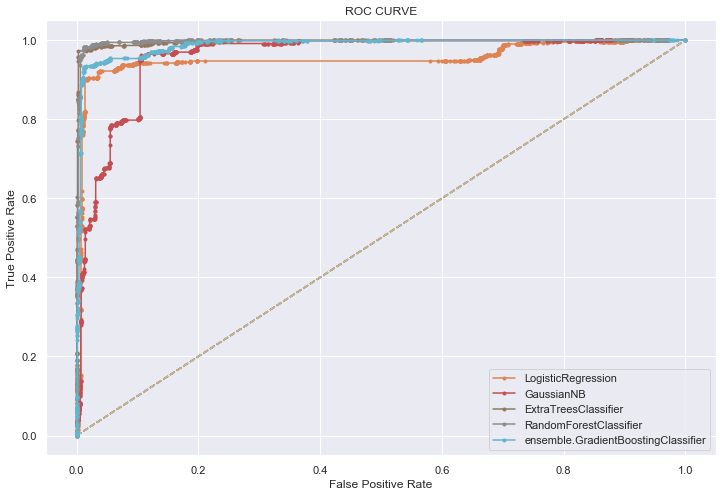

In [823]:
idx = 0
plt.figure(figsize=(12,8))
ns_probs = [0 for _ in range(len(y_t))] # no skill prediction 
MLclf = [LogisticRegression(), GaussianNB(), ExtraTreesClassifier(), RandomForestClassifier(), ensemble.GradientBoostingClassifier() ]
lablist = ['LogisticRegression' , 'GaussianNB', 'ExtraTreesClassifier','RandomForestClassifier','ensemble.GradientBoostingClassifier']
roc_list = []
for clf in MLclf: 
    y_p = clf.fit(x_tr, y_tr).predict(x_t)
    clf_probs = clf.predict_proba(x_t)
    clf_probs = clf_probs[:, 1]
    ns_auc = roc_auc_score(y_t, ns_probs)
    clf_auc = roc_auc_score(y_t, clf_probs)
    ns_fpr, ns_tpr, _ = roc_curve(y_t, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_t, clf_probs) 
    lab_p = lablist[idx] 
    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=lab_p ) 
    pyplot.legend()
    idx += 1
    roc_list.append(roc_auc_score(y_t, y_p))
    

plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [824]:
best_roc = 0
best_roc_idx = 0

for idx in range(len(roc_list)):
    if (roc_list[idx]>best_roc):
        best_roc = roc_list[idx]
        best_roc_idx = idx

print('The best classifier from default parameter : ExtraTreesClassifier', '\n', 'with roc_auc_score : ', best_roc)
MLclf[best_roc_idx]    

The best classifier from default parameter : ExtraTreesClassifier 
 with roc_auc_score :  0.9848973497573722


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [825]:
help(ExtraTreesClassifier)

Help on class ExtraTreesClassifier in module sklearn.ensemble.forest:

class ExtraTreesClassifier(ForestClassifier)
 |  ExtraTreesClassifier(n_estimators='warn', criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)
 |  
 |  An extra-trees classifier.
 |  
 |  This class implements a meta estimator that fits a number of
 |  randomized decision trees (a.k.a. extra-trees) on various sub-samples
 |  of the dataset and uses averaging to improve the predictive accuracy
 |  and control over-fitting.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |      .. versionchanged:: 0.20
 |         The default